In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
sns.set_theme(style="darkgrid")
import scipy.stats
from random import seed
from random import random
from matplotlib import pyplot
import pylab
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from  statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2

In [2]:
# Importing the data
raw_csv_data = pd.read_excel("CallCenterData.xlsx")

In [3]:
# Check point of data
df_comp = raw_csv_data.copy()

In [4]:
# Checking first few rows of data
df_comp.head()

,month,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
0,2010-01-31,631,8,6,2,19,1,4
1,2010-02-28,633,9,7,3,27,1,3
2,2010-03-31,766,4,4,2,24,1,1
3,2010-04-30,768,12,6,3,32,1,1
4,2010-05-31,1003,2,7,2,42,1,4


In [5]:
# Checking Descriptive Stats
df_comp.describe()

,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,9856.704545,2411.856061,514.204545,112.454545,651.681818,2.250000,2.537879
std,6221.071304,1714.759241,392.882978,69.680773,395.949633,1.867255,1.161766
min,631.000000,2.000000,4.000000,2.000000,19.000000,0.000000,1.000000
25%,3744.250000,608.750000,119.000000,39.750000,363.500000,1.000000,1.000000
50%,9651.500000,2613.500000,486.000000,130.500000,581.000000,2.000000,3.000000
75%,15590.750000,4000.500000,901.500000,171.250000,997.750000,3.000000,4.000000
max,23602.000000,5138.000000,1310.000000,229.000000,1535.000000,11.000000,4.000000


In [6]:
# Checking Null values
df_comp.isna().sum()

month            0
Healthcare       0
Telecom          0
Banking          0
Technology       0
Insurance        0
#ofphonelines    0
#noofchannels    0
dtype: int64

---

## Setting date as Index

In [ ]:
# Describe the datetime field "month"
df_comp.month.describe()


In [8]:
# Set the "month" column as the index of the DataFrame df_comp
df_comp.set_index("month", inplace=True)


In [9]:
df_comp.head()

,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
month,,,,,,,
2010-01-31,631,8,6,2,19,1,4
2010-02-28,633,9,7,3,27,1,3
2010-03-31,766,4,4,2,24,1,1
2010-04-30,768,12,6,3,32,1,1
2010-05-31,1003,2,7,2,42,1,4


In [10]:
# Set the frequency of the DataFrame df_comp to monthly
df_comp = df_comp.asfreq('M')

,Healthcare,Telecom,Banking,Technology,Insurance,#ofphonelines,#noofchannels
month,,,,,,,
2010-01-31,631,8,6,2,19,1,4
2010-02-28,633,9,7,3,27,1,3
2010-03-31,766,4,4,2,24,1,1
2010-04-30,768,12,6,3,32,1,1
2010-05-31,1003,2,7,2,42,1,4
...,...,...,...,...,...,...,...
2020-08-31,20257,4486,1111,212,371,4,3
2020-09-30,19207,4474,1020,135,362,3,1
2020-10-31,23414,5138,1310,188,523,3,4


In [12]:
# Checking for the Null values
df_comp.isna().sum()

Healthcare       0
Telecom          0
Banking          0
Technology       0
Insurance        0
#ofphonelines    0
#noofchannels    0
dtype: int64

---

## Time Series Visualization

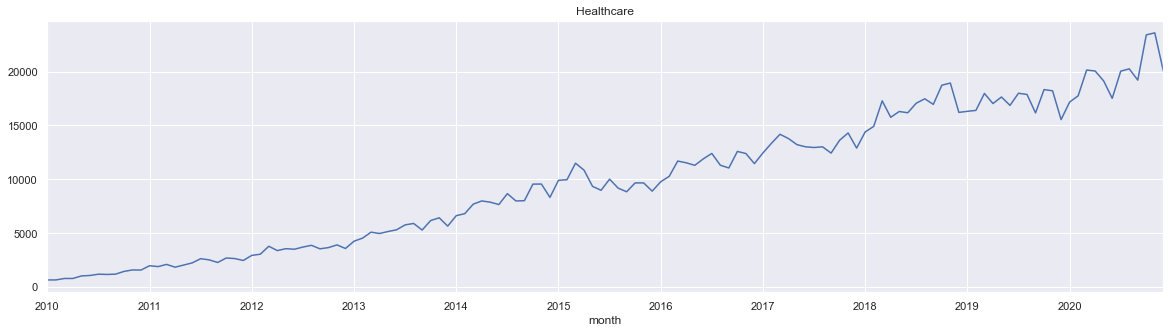

In [13]:
# Plot the "Healthcare" column
df_comp.Healthcare.plot(figsize=(20, 5), title="Healthcare")
plt.show()


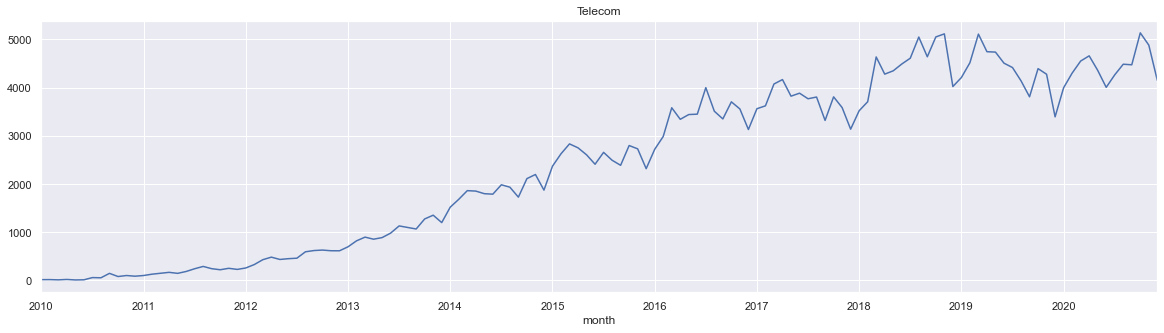

In [14]:
# Plot the "Telecom" column
df_comp.Telecom.plot(figsize=(20, 5), title="Telecom")
plt.show()

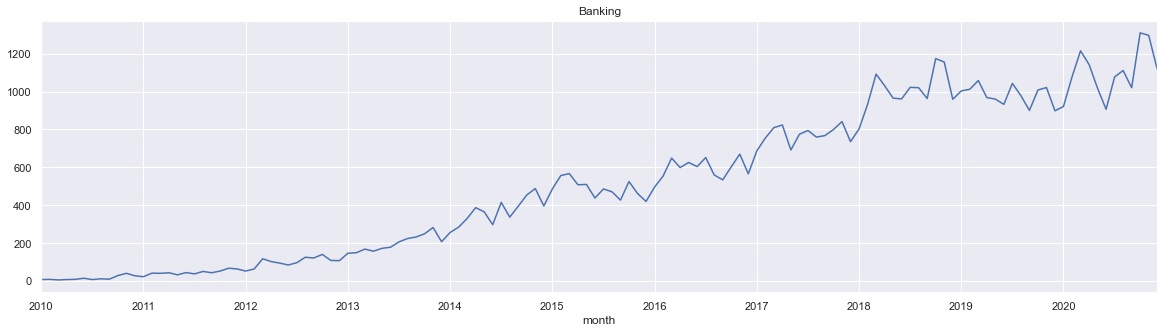

In [15]:
# Plot the "Banking" column
df_comp.Banking.plot(figsize=(20, 5), title="Banking")
plt.show()

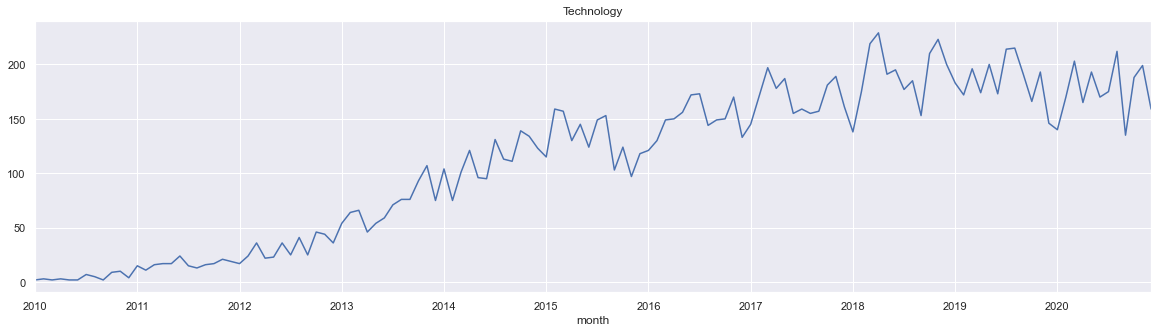

In [16]:
# Plot the "Technology" column
df_comp.Technology.plot(figsize=(20, 5), title="Technology")
plt.show()

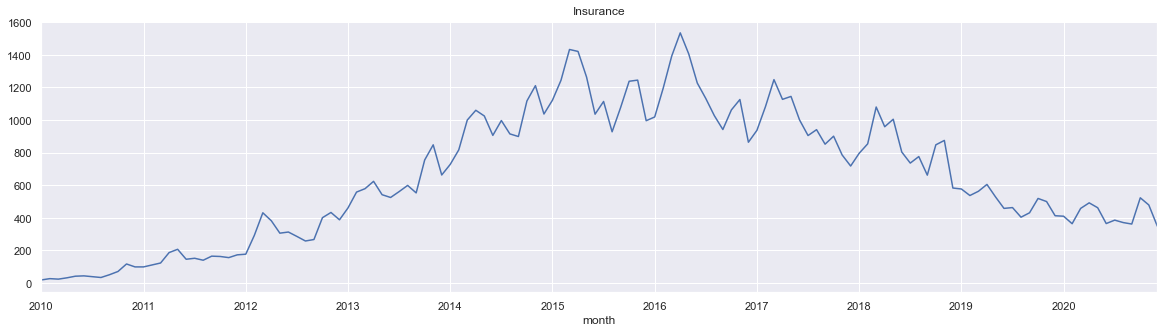

In [17]:
# Plot the "Insurance" column
df_comp.Insurance.plot(figsize=(20, 5), title="Insurance")
plt.show()

---

## White Noise

In [18]:
# Generating white noise data for the Healthcare attribute
wn = np.random.normal(loc=df_comp.Healthcare.mean(), scale=df_comp.Healthcare.std(), size=len(df_comp))

In [19]:
# Add the generated white noise data to the DataFrame as a new column named "wn"
df_comp["wn"] = wn

In [20]:
df_comp.wn.describe()

count      132.000000
mean      9618.629604
std       6421.292835
min      -9159.968737
25%       4995.704862
50%       9153.154368
75%      14270.491618
max      24442.327677
Name: wn, dtype: float64

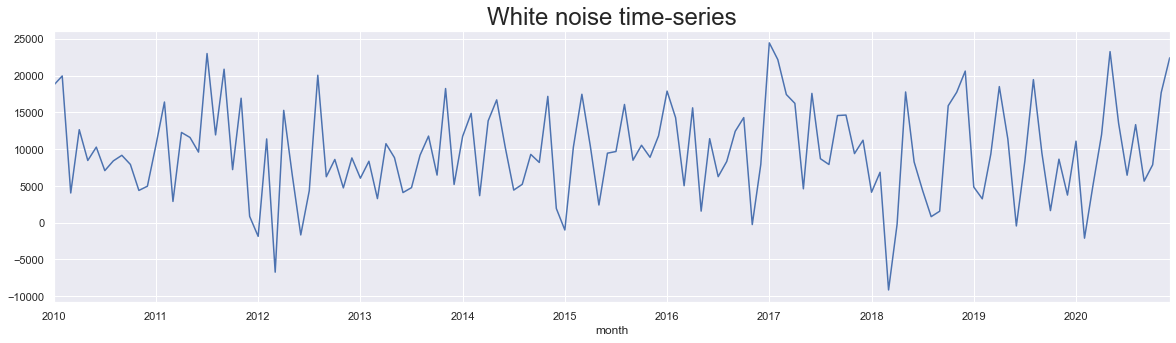

In [21]:
# Plot the white noise time-series
df_comp.wn.plot(figsize=(20, 5))
plt.title("White noise time-series", size=24)
plt.show()


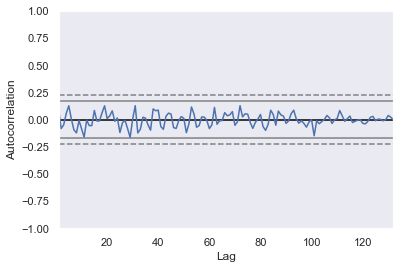

In [22]:
# Create an autocorrelation plot for the white noise data in df_comp
autocorrelation_plot(df_comp.wn)
plt.show()

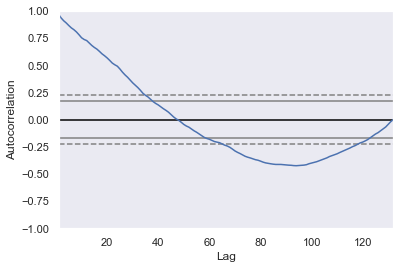

In [23]:
# Create an autocorrelation plot for the "Healthcare" column
autocorrelation_plot(df_comp.Healthcare)
plt.show()

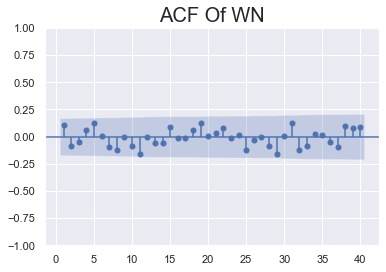

In [24]:
# Plot the autocorrelation function (ACF) of the white noise data in df_comp
sgt.plot_acf(df_comp.wn, zero=False, lags=40)
plt.title("ACF Of WN", size=20)
plt.show()

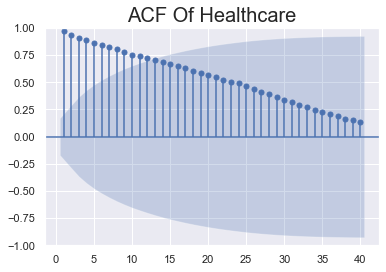

In [25]:
# Plot the autocorrelation function (ACF) of the "Healthcare" column
sgt.plot_acf(df_comp.Healthcare, zero=False, lags=40)
plt.title("ACF Of Healthcare", size=20)
plt.show()


---

## Random Walk

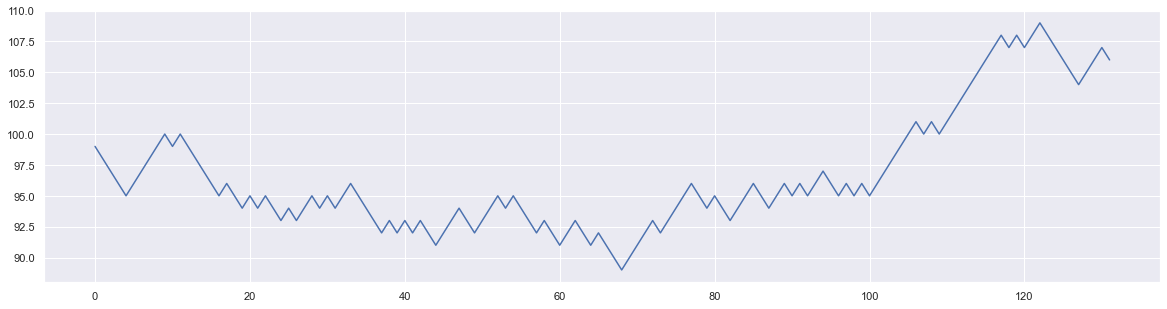

In [26]:
# Simulate a random walk with an initial value of 99
walk = [99]
noise1 = []

# Generate random walk data with random noise
for i in range(1900):
    # Create random noise: -1 or 1 with equal probability
    noise = -1 if np.random.random() < 0.5 else 1
    noise1.append(noise)
    walk.append(walk[-1] + noise)

# Plot the first 132 data points of the random walk
plt.figure(figsize=(20, 5))
plt.plot(walk[:132])

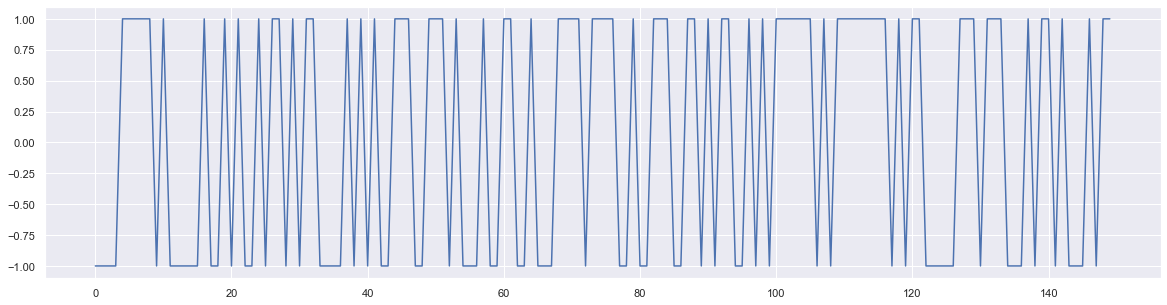

In [27]:
# Create a figure with a specified size and plot the first 150 data points of the generated noise
plt.figure(figsize=(20, 5))
plt.plot(noise1[:150])


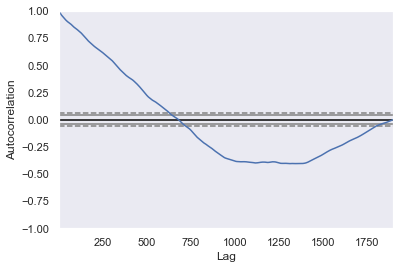

In [28]:
# Create an autocorrelation plot for the random walk data in the "walk" variable
autocorrelation_plot(walk)
plt.show()

---

## Stationarity

### Ad Fuller Test

In [29]:
# Perform the Augmented Dickey-Fuller (AD Fuller) test for stationarity on the white noise data in df_comp
sts.adfuller(df_comp.wn)

(-10.131157266765848,
 8.910707342953466e-18,
 0,
 131,
 {'1%': -3.481281802271349,
  '5%': -2.883867891664528,
  '10%': -2.5786771965503177},
 2411.4671094879463)

In [30]:
# Perform the Augmented Dickey-Fuller (AD Fuller) test for stationarity on the "Healthcare" column of df_comp
sts.adfuller(df_comp.Healthcare)


(0.6354247416388461,
 0.9884570085984413,
 13,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 1856.9782100198688)

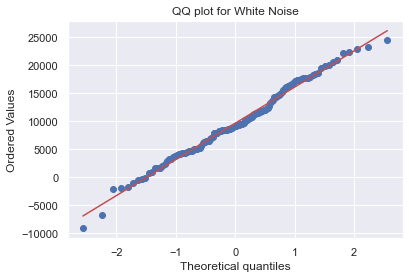

In [31]:
# Create a QQ plot for testing the Gaussian distribution of the white noise data in df_comp
scipy.stats.probplot(df_comp.wn, plot=pylab)
plt.title("QQ plot for White Noise")
pylab.show()


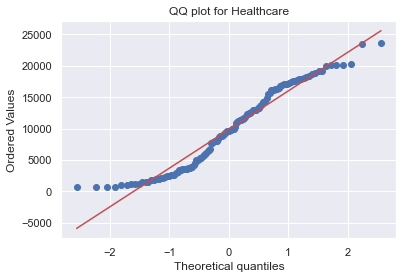

In [32]:
# Create a QQ plot for the "Healthcare" column in df_comp
scipy.stats.probplot(df_comp.Healthcare, plot=pylab)
plt.title("QQ plot for Healthcare")
pylab.show()


---

## Seasonality

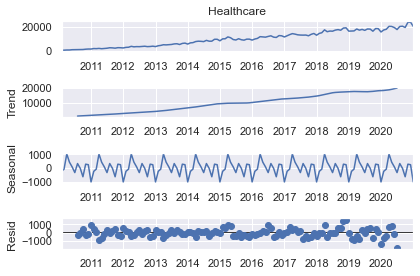

In [33]:
# Perform a naive decomposition using the additive model for the "Healthcare" column in df_comp
# Decomposition separates the observed data into Trend, Seasonal, and Residual components -> observed = Trend + Sesonal + Residual
additive = seasonal_decompose(df_comp.Healthcare, model="additive")
additive.plot()
plt.show()

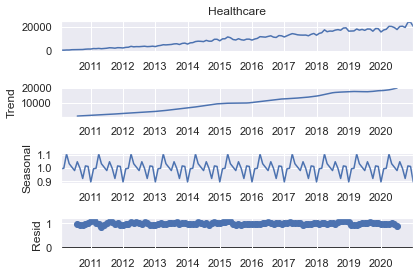

In [34]:
# Perform a naive decomposition using the multiplicative model for the "Healthcare" column in df_comp
# Decomposition separates the observed data into Trend, Seasonal, and Residual components -> observed = Trend * Sesonal * Residual
additive = seasonal_decompose(df_comp.Healthcare, model="multiplicative")
additive.plot()
plt.show()

---

## Holt Winter Exponential Smoothing 

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [36]:
# Create an Exponential Smoothing model for the "Healthcare" column in df_comp
hw_model = ExponentialSmoothing(df_comp.Healthcare.tolist())

# Fit the Exponential Smoothing model to the data
model_fit = hw_model.fit()


In [37]:
# Make predictions using the fitted Exponential Smoothing model
# We are calling the model to predict all data points that are the same as the dataset to evaluate the model's performance
yhat = model_fit.predict(1, len(df_comp))

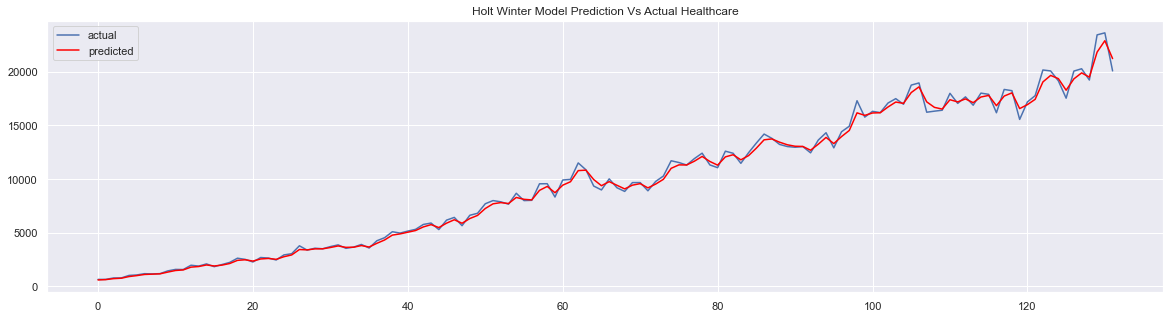

In [38]:
# Create a figure with a specified size and plot the actual and predicted "Healthcare" data
plt.figure(figsize=(20, 5))
plt.plot(df_comp.Healthcare.tolist())
plt.plot(yhat.tolist(), color='red')
plt.title("Holt Winter Model Prediction Vs Actual Healthcare")
plt.legend(["actual", "predicted"])
plt.show()

---

## ARIMA

#### LLR TEST

In [39]:
# Define a function to perform a likelihood ratio test (LLR) between two models
def LLR_test(mod_1, mod_2, DF=1):
    # Calculate the log-likelihood of model 1
    L1 = mod_1.fit().llf
    # Calculate the log-likelihood of model 2
    L2 = mod_2.fit().llf
    # Calculate the likelihood ratio (LR) statistic
    LR = (2 * (L2 - L1))
    # Calculate the p-value using the chi-squared distribution
    p = chi2.sf(LR, DF).round(3)
    return p


### ARIMA(1,1,1)

In [40]:
# Calculate the first-order difference (integration by 1 factor) for the "Healthcare" column
df_comp["delta_1_Healthcare"] = df_comp.Healthcare.diff(1)


In [41]:
# Display the "delta_1_Healthcare" column
print(df_comp["delta_1_Healthcare"])

month
2010-01-31       NaN
2010-02-28       2.0
2010-03-31     133.0
2010-04-30       2.0
2010-05-31     235.0
               ...  
2020-08-31     216.0
2020-09-30   -1050.0
2020-10-31    4207.0
2020-11-30     188.0
2020-12-31   -3544.0
Freq: M, Name: delta_1_Healthcare, Length: 132, dtype: float64

In [42]:
# Check for stationarity using the Augmented Dickey-Fuller (AD Fuller) test
sts.adfuller(df_comp.delta_1_Healthcare[1:])

(-3.4441504474648905,
 0.009542765330356655,
 13,
 117,
 {'1%': -3.487517288664615,
  '5%': -2.8865777180380032,
  '10%': -2.5801239192052012},
 1838.875046179446)

In [43]:
# Create an ARIMA(1,1,1) model for the "Healthcare" column in df_comp
model_ar_1_i_1_ma_1 = ARIMA(df_comp.Healthcare, order=(1, 1, 1))

# Fit the ARIMA(1,1,1) model to the data
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()

# Display a summary of the fitted model
results_ar_1_i_1_ma_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Healthcare   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1084.123
Date:                Mon, 11 Oct 2021   AIC                           2174.246
Time:                        19:21:43   BIC                           2182.872
Sample:                    01-31-2010   HQIC                          2177.751
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1975      0.204      0.968      0.333      -0.202       0.597
ma.L1         -0.5422      0.160     -3.395      0.001      -0.855      -0.229
sigma2      9.542e+05   8.36e+04     11.408      0.000     7.9e+05    1.12e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                54.20
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):              18.41   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Residual of ARIMA(1,1,1)

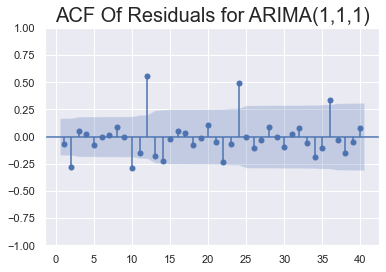

In [44]:
# Create a new column in df_comp for the residuals of ARIMA(1,1,1) model
df_comp['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid

# Plot the autocorrelation function (ACF) of the residuals for ARIMA(1,1,1)
sgt.plot_acf(df_comp.res_ar_1_i_1_ma_1, zero=False, lags=40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)", size=20)
plt.show()


### Higher Lag ARIMA

In [45]:
# Since 2nd Lag is signification
# We need to take ARIMA(2,1,2) and its nested components => (1,1,2), (2,1,1), (2,1,2)
# IFF (3,1,3) => p=1,2,3 q=1,2,3 - (1,1,3), (2,1,3), (3,1,3), (3,1,1), (3,1,2)

In [46]:
# Create and fit multiple ARIMA models with different orders for the "Healthcare" column in df_comp
model_ar_1_i_1_ma_2 = ARIMA(df_comp.Healthcare, order=(1, 1, 2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()

model_ar_2_i_1_ma_1 = ARIMA(df_comp.Healthcare, order=(2, 1, 1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()

model_ar_2_i_1_ma_2 = ARIMA(df_comp.Healthcare, order=(2, 1, 2))
results_ar_2_i_1_ma_2 = model_ar_2_i_1_ma_2.fit()


In [47]:
# Print the log-likelihood (LL) and Akaike Information Criterion (AIC) for different ARIMA models
print("ARIMA(1,1,2):  \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(2,1,1):  \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(2,1,2):  \t LL = ", results_ar_2_i_1_ma_2.llf, "\t AIC = ", results_ar_2_i_1_ma_2.aic)

ARIMA(1,1,2):  	 LL =  -1081.8845342530321 	 AIC =  2171.7690685060643
ARIMA(2,1,1):  	 LL =  -1080.0660363019072 	 AIC =  2168.1320726038143
ARIMA(2,1,2):  	 LL =  -1079.9523094067135 	 AIC =  2169.904618813427


In [ ]:
# Save the ARIMA model with low Log Likelihood (LL) and high Information Criterion (AIC)
import pickle

# Pickle (serialize) the results_ar_2_i_1_ma_1 model and save it to a file named "arima_model.pkl"
pickle.dump(results_ar_2_i_1_ma_1, open("../output/arima_model.pkl", "wb"))

In [48]:
# Check the models using the Likelihood Ratio Test (LLR) and print the p-value
print("\nLLR test p-value = " + str(LLR_test(model_ar_1_i_1_ma_1, model_ar_2_i_1_ma_2, DF=2)))


LLR test p-value = 0.015


In [49]:
# Check the models using the Likelihood Ratio Test (LLR) and print the p-value
print("\nLLR test p-value = " + str(LLR_test(model_ar_1_i_1_ma_1, model_ar_2_i_1_ma_1, DF=1)))


LLR test p-value = 0.004


In [50]:
# Check the models using the Likelihood Ratio Test (LLR) and print the p-value
print("\nLLR test p-value = " + str(LLR_test(model_ar_2_i_1_ma_1, model_ar_2_i_1_ma_2, DF=1)))


LLR test p-value = 0.633


### ARIMA (2,1,1) Showed the higher Log Likelyhood and Smaller AIC

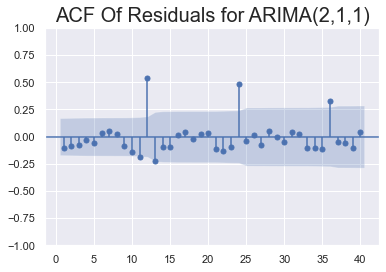

In [51]:
# Calculate and store the residuals for ARIMA(2,1,1) in df_comp
df_comp['res_ar_2_i_1_ma_1'] = results_ar_2_i_1_ma_1.resid

# Plot the autocorrelation function (ACF) of the residuals for ARIMA(2,1,1)
sgt.plot_acf(df_comp.res_ar_2_i_1_ma_1, zero=False, lags=40)
plt.title("ACF Of Residuals for ARIMA(2,1,1)", size=20)
plt.show()


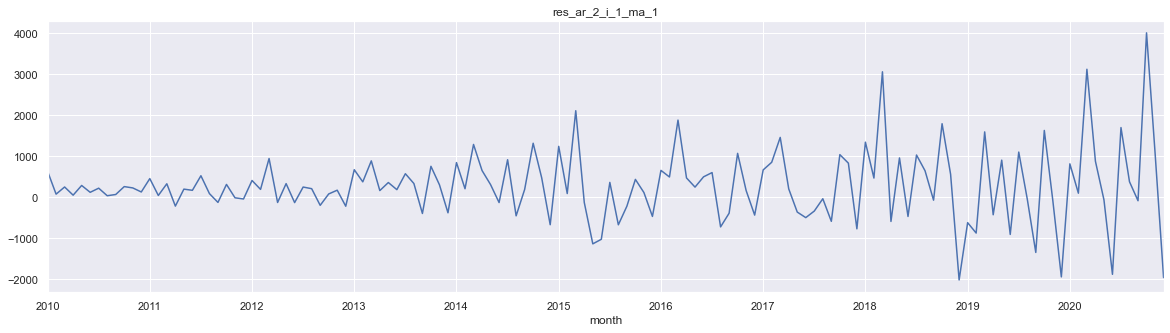

In [53]:
# Plot the "res_ar_2_i_1_ma_1" column
df_comp['res_ar_2_i_1_ma_1'].plot(figsize=(20, 5), title="res_ar_2_i_1_ma_1")
plt.show()


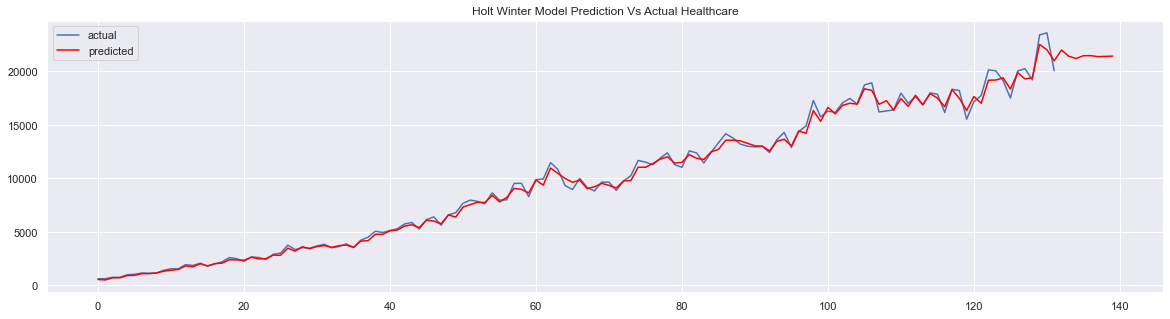

In [71]:
# Make predictions using the ARIMA(2,1,1) model for future time points
yhat = results_ar_2_i_1_ma_1.predict(1, len(df_comp) + 8)

# Plot the actual and predicted values
plt.figure(figsize=(20, 5))
plt.plot(df_comp.Healthcare.tolist())
plt.plot(yhat.tolist(), color='red')
plt.title("ARIMA(2,1,1) Model Prediction Vs Actual Healthcare")
plt.legend(["actual", "predicted"])
plt.show()


In [52]:
# Hence we are able to predict correctly for more than 12 lags
# As by logic we don't have to include the higher lag models to avoid overfitting
# Hence we go ahead with ARIMA(2,1,1)

---

## Models with Higher Levels of Integration

In [54]:
# Calculate and store the second-order difference of the "Healthcare" column
df_comp["delta_2_Healthcare"] = df_comp.Healthcare.diff(2)

In [55]:
df_comp["delta_2_Healthcare"].head()

month
2010-01-31      NaN
2010-02-28      NaN
2010-03-31    135.0
2010-04-30    135.0
2010-05-31    237.0
Freq: M, Name: delta_2_Healthcare, dtype: float64

In [56]:
# Perform the Augmented Dickey-Fuller test on the "delta_2_Healthcare" column, excluding the first two values
sts.adfuller(df_comp.delta_2_Healthcare[2:])

(-3.9457472173137784,
 0.0017228133460868663,
 13,
 116,
 {'1%': -3.4880216384691867,
  '5%': -2.8867966864160075,
  '10%': -2.5802408234244947},
 1820.1316990461048)

In [ ]:
# Create and fit an ARIMA(1,2,1) model for the "Healthcare" column in df_comp
model_ar_1_i_2_ma_1 = ARIMA(df_comp.Healthcare, order=(1, 2, 1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit()

# Display a summary of the ARIMA(1,2,1) model
results_ar_1_i_2_ma_1.summary()


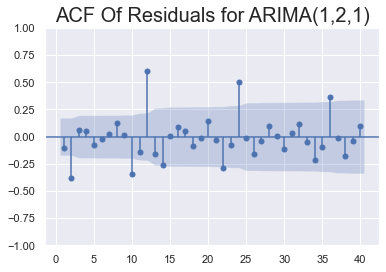

In [58]:
# Store the residuals of the ARIMA(1,2,1) model in the "res_ar_1_i_2_ma_1" column of df_comp
df_comp['res_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid.iloc[:]

# Plot the autocorrelation function (ACF) of the residuals for ARIMA(1,2,1)
sgt.plot_acf(df_comp.res_ar_1_i_2_ma_1[2:], zero=False, lags=40)
plt.title("ACF Of Residuals for ARIMA(1,2,1)", size=20)
plt.show()

---

## ARIMAX

In [59]:
# Create and fit an ARIMA(1,1,1) model with exogenous variable "Banking" for the "Healthcare" column in df_comp
model_ar_1_i_1_ma_1_X = ARIMA(df_comp.Healthcare, exog=df_comp.Banking, order=(1, 1, 1))
results_ar_1_i_1_ma_1_X = model_ar_1_i_1_ma_1_X.fit()

# Display a summary of the ARIMA(1,1,1) model with exogenous variable
results_ar_1_i_1_ma_1_X.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Healthcare   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -990.982
Date:                Mon, 11 Oct 2021   AIC                           1989.964
Time:                        19:38:04   BIC                           2001.465
Sample:                    01-31-2010   HQIC                          1994.638
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Banking       11.9912      0.508     23.627      0.000      10.996      12.986
ar.L1         -0.2402      0.143     -1.674      0.094      -0.521       0.041
ma.L1         -0.3560      0.134     -2.656      0.008      -0.619      -0.093
sigma2      2.174e+05   2.84e+04      7.649      0.000    1.62e+05    2.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):                 3.17
Prob(Q):                              0.49   Prob(JB):                         0.21
Heteroskedasticity (H):               5.44   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

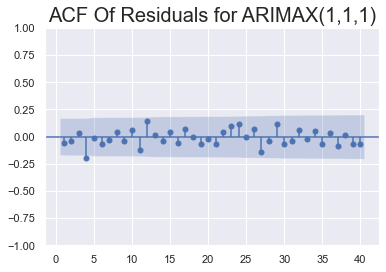

In [60]:
# Store the residuals of the ARIMAX(1,1,1) model in the "resX_ar_1_i_1_ma_1" column of df_comp
df_comp['resX_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1_X.resid.iloc[:]

# Plot the autocorrelation function (ACF) of the residuals for ARIMAX(1,1,1)
sgt.plot_acf(df_comp.resX_ar_1_i_1_ma_1, zero=False, lags=40)
plt.title("ACF Of Residuals for ARIMAX(1,1,1)", size=20)
plt.show()

---

## SARIMAX

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [62]:
# Create and fit a SARIMAX(1,1,1) model with exogenous variable "Banking" and seasonal order (2,0,1,5)
model_sarimax = SARIMAX(df_comp.Healthcare, exog=df_comp.Banking, order=(1, 1, 1), seasonal_order=(2, 0, 1, 5))
results_sarimax = model_sarimax.fit()

# Display a summary of the SARIMAX(1,1,1) model with seasonal order (2,0,1,5)
results_sarimax.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.50750D+00    |proj g|=  7.51985D-02

At iterate    5    f=  7.50211D+00    |proj g|=  1.08101D-02

At iterate   10    f=  7.50105D+00    |proj g|=  1.24523D-02

At iterate   15    f=  7.50051D+00    |proj g|=  5.73088D-03


 This problem is unconstrained.



At iterate   20    f=  7.50045D+00    |proj g|=  1.15290D-04

At iterate   25    f=  7.50040D+00    |proj g|=  4.31233D-03

At iterate   30    f=  7.49973D+00    |proj g|=  6.91498D-03

At iterate   35    f=  7.49966D+00    |proj g|=  2.62002D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     40      1     0     0   1.422D-05   7.500D+00
  F =   7.4996577189481082     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                        Healthcare   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(2, 0, 1, 5)   Log Likelihood                -989.955
Date:                           Mon, 11 Oct 2021   AIC                           1993.910
Time:                                   19:43:52   BIC                           2014.036
Sample:                               01-31-2010   HQIC                          2002.088
                                    - 12-31-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Banking       11.9917      0.494     24.268      0.000      11.023      12.960
ar.L1         -0.1539      0.150     -1.024      0.306      -0.448       0.141
ma.L1         -0.4326      0.132     -3.273      0.001      -0.692      -0.174
ar.S.L5        0.4572      0.551      0.830      0.407      -0.623       1.537
ar.S.L10       0.1061      0.095      1.113      0.266      -0.081       0.293
ma.S.L5       -0.4295      0.562     -0.764      0.445      -1.531       0.672
sigma2      2.137e+05   2.78e+04      7.674      0.000    1.59e+05    2.68e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 1.70
Prob(Q):                              0.61   Prob(JB):                         0.43
Heteroskedasticity (H):               5.39   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

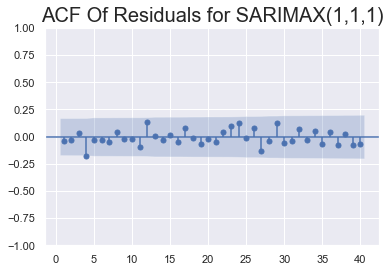

In [63]:
# Store the residuals of the SARIMAX(1,1,1) model in the "results_sarimax" column of df_comp
df_comp['results_sarimax'] = results_sarimax.resid.iloc[:]

# Plot the autocorrelation function (ACF) of the residuals for SARIMAX(1,1,1)
sgt.plot_acf(df_comp.results_sarimax, zero=False, lags=40)
plt.title("ACF Of Residuals for SARIMAX(1,1,1)", size=20)
plt.show()

---